In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?class=6;id=2022;type=year'

# Set up headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request with headers
response = requests.get(url, headers=headers)
response.raise_for_status()

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the data
table = soup.find('table')

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:
    cols = [col.text.strip() for col in row.find_all('td')]
    if cols:
        rows.append(cols)
headers = [
    'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave',
    'SR', '100', '50', '0'
]




In [ ]:
df = pd.DataFrame(rows, columns=headers)


In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,PW Hasaranga,2022-2022,50,34,8,409,77*,15.73,134.53,-,2,2
1,Pramod Madushan,2022-2022,18,8,5,44,23*,14.66,88.00,-,-,1
2,CG Khurana,2022-2022,7,7,-,108,73,15.42,91.52,-,1,1
3,PK Panchal,2022-2022,5,5,1,169,59,42.25,138.52,-,1,-
4,SR Mohanty,2022-2022,5,4,1,33,19,11.00,82.50,-,-,-


<ipython-input-23-8a3dd1344dd3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runs', y='Player', data=top_scorers, palette='viridis')


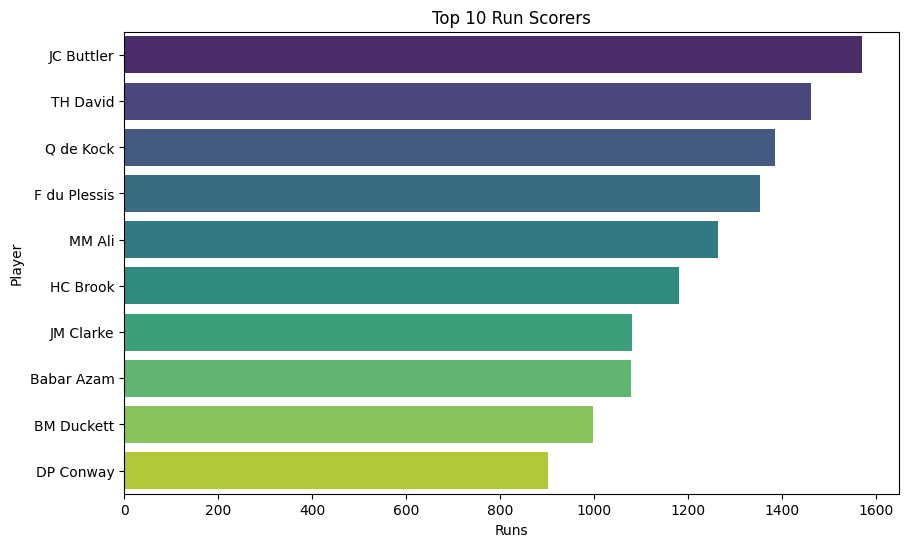

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert appropriate columns to numeric
df = pd.DataFrame(rows, columns=headers)
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')


# Top 10 Run Scorers
top_scorers = df.nlargest(10, 'Runs')
plt.figure(figsize=(10, 6))
sns.barplot(x='Runs', y='Player', data=top_scorers, palette='viridis')
plt.title('Top 10 Run Scorers')
plt.show()




            Player       Span Mat Inns NO Runs   HS    Ave      SR 100 50  0
0     PW Hasaranga  2022-2022  50   34  8  409  77*  15.73  134.53   -  2  2
1  Pramod Madushan  2022-2022  18    8  5   44  23*  14.66   88.00   -  -  1
2       CG Khurana  2022-2022   7    7  -  108   73  15.42   91.52   -  1  1
3       PK Panchal  2022-2022   5    5  1  169   59  42.25  138.52   -  1  -
4       SR Mohanty  2022-2022   5    4  1   33   19  11.00   82.50   -  -  -
